# **Installing Dwave Package**


In [1]:
!pip install dwave-ocean-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.6/305.6 kB 25.9 MB/s eta 0:00:00


# **Function to Generate The Qubo Model of the Graph Coloring Problem**

Linear terms: {(0, 0): -10.0, (0, 1): -10.0, (0, 2): -10.0, (0, 3): -10.0, (0, 4): -10.0, (1, 0): -10.0, (1, 1): -10.0, (1, 2): -10.0, (1, 3): -10.0, (1, 4): -10.0, (2, 0): -10.0, (2, 1): -10.0, (2, 2): -10.0, (2, 3): -10.0, (2, 4): -10.0, (3, 0): -10.0, (3, 1): -10.0, (3, 2): -10.0, (3, 3): -10.0, (3, 4): -10.0, (4, 0): -10.0, (4, 1): -10.0, (4, 2): -10.0, (4, 3): -10.0, (4, 4): -10.0, (5, 0): -10.0, (5, 1): -10.0, (5, 2): -10.0, (5, 3): -10.0, (5, 4): -10.0}
Quadratic terms: {((0, 1), (0, 0)): 10.0, ((0, 2), (0, 0)): 10.0, ((0, 2), (0, 1)): 10.0, ((0, 3), (0, 0)): 10.0, ((0, 3), (0, 1)): 10.0, ((0, 3), (0, 2)): 10.0, ((0, 4), (0, 0)): 10.0, ((0, 4), (0, 1)): 10.0, ((0, 4), (0, 2)): 10.0, ((0, 4), (0, 3)): 10.0, ((1, 0), (0, 0)): 10.0, ((1, 1), (0, 1)): 10.0, ((1, 1), (1, 0)): 10.0, ((1, 2), (0, 2)): 10.0, ((1, 2), (1, 0)): 10.0, ((1, 2), (1, 1)): 10.0, ((1, 3), (0, 3)): 10.0, ((1, 3), (1, 0)): 10.0, ((1, 3), (1, 1)): 10.0, ((1, 3), (1, 2)): 10.0, ((1, 4), (0, 4)): 10.0, ((1, 4), (1, 

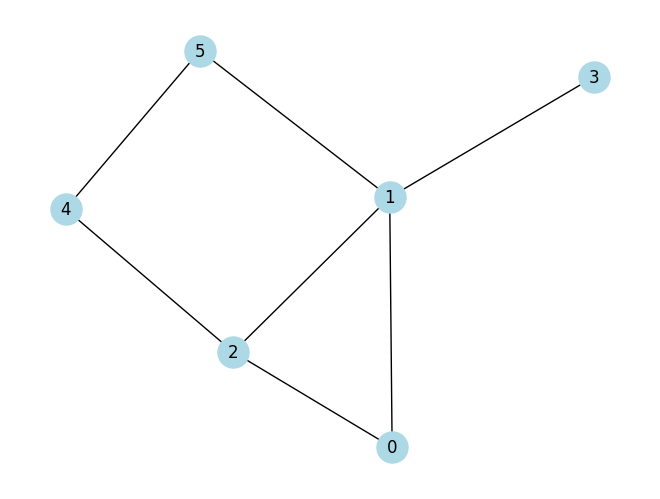

In [10]:
import networkx as nx
from dimod import BinaryQuadraticModel
import numpy as np

def generate_qubo(graph, num_colors):
    """
    Generate the QUBO model for the graph coloring problem.

    Parameters:
    graph (networkx.Graph): The graph to be colored.
    num_colors (int): The number of colors.

    Returns:
    BinaryQuadraticModel: The QUBO model for the graph coloring problem.
    """
    # Define penalty strengths
    A = 10  # Penalty for ensuring one color per vertex
    B = 10  # Penalty for ensuring adjacent nodes do not share the same color

    # Initialize the linear and quadratic coefficients for the QUBO model
    linear = {}
    quadratic = {}

    # One color per vertex constraint
    for v in graph.nodes:
        for i in range(num_colors):
            linear[(v, i)] = -A
            for j in range(i + 1, num_colors):
                quadratic[((v, i), (v, j))] = A

    # Adjacent vertices must not share the same color constraint
    for (u, v) in graph.edges:
        for i in range(num_colors):
            quadratic[((u, i), (v, i))] = B

    # Create the Binary Quadratic Model (BQM)
    bqm = BinaryQuadraticModel(linear, quadratic, 0.0, 'BINARY')

    return bqm

# Example usage
if __name__ == "__main__":
    # Define the graph
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3),(4,5),(1,5), (2,4)])
    num_colors = 5

    # Generate the QUBO model
    bqm = generate_qubo(G, num_colors)

    # Print the QUBO model
    print("Linear terms:", bqm.linear)
    print("Quadratic terms:", bqm.quadratic)

    # For visualization purposes
    import matplotlib.pyplot as plt

    # Draw the graph
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)
    plt.show()


Importing the Dwave Packages

In [6]:
from dimod import BinaryQuadraticModel
from dwave.system import EmbeddingComposite, DWaveSampler

Initialize the tokens and the solver

In [7]:
#Using Dwave Quantum Computer to solve the QUBO problem
token = 'DEV-abdc4c7339474eacea7a99b9e4269e22f667d3f2'
solver = 'Advantage_system6.4'

Running the program and plot the output

Coloring solution: {0: 4, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1}
Energy: -60.0


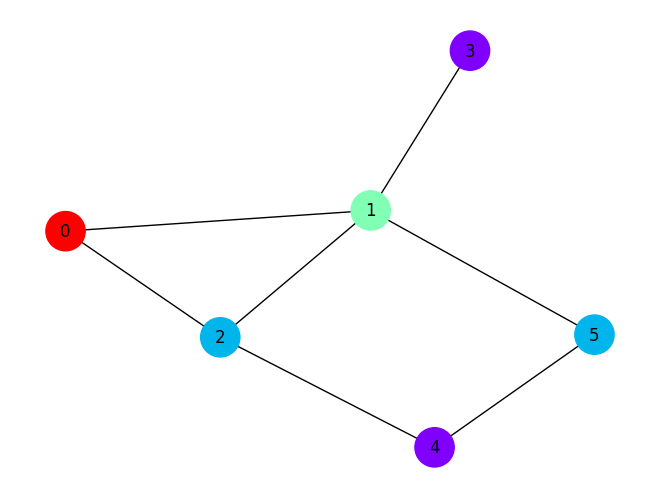

In [12]:
sampler = EmbeddingComposite(DWaveSampler(token= token, solver = solver))
sampleset = sampler.sample(bqm, num_reads=100)
# Get the best solution
solution = sampleset.first.sample
energy = sampleset.first.energy

# Extract the coloring from the solution
coloring = {}
for v in G.nodes:
    for i in range(num_colors):
        if solution[(v, i)] == 1:
            coloring[v] = i

# Print the coloring solution
print("Coloring solution:", coloring)
print("Energy:", energy)

# Visualize the colored graph
colors = [coloring[node] for node in G.nodes]
nx.draw(G, with_labels=True, node_color=colors, node_size=800, cmap=plt.cm.rainbow)
plt.show()